p0= 34000
    years keeping     car costs  cost buy new     cost buy  cost keeping   cost total  cost total new  cost total mixed
0               1  30600.000000  34000.000000  3400.000000           100  3500.000000    34100.000000       3500.000000
1               2  27540.000000  17000.000000  3230.000000           200  3430.000000    17200.000000       3430.000000
2               3  24786.000000  11333.333333  3071.333333           150  3221.333333    11483.333333       3221.333333
3               4  22307.400000   8500.000000  2923.150000           300  3223.150000     8800.000000       3223.150000
4               5  20076.660000   6800.000000  2784.668000           800  3584.668000     7600.000000       3584.668000
5               6  18068.994000   5666.666667  2655.167667           800  3455.167667     6466.666667       3455.167667
6               7  16262.094600   4857.142857  2533.986486           800  3333.986486     5657.142857       3333.986486
7               8  14635.88514

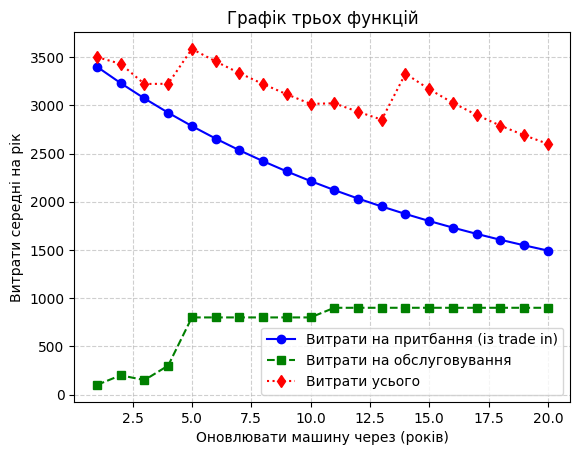

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # Виводити всі колонки
pd.set_option('display.width', 1000)        # Збільшити ширину
pd.set_option('display.max_colwidth', 150)

p0 = 34000 # 20000 * 1.274
print('p0=', p0)
a = 0.9 # 0.9 - пробіг 15 тис на рік; 0.85 - пробіг 30 тис на рік.

yk = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

def car_costs(yk, p0, a):
    return p0 * a**yk

def cost_buy_with_trade_in(yk, p0, a):
    return p0 * (1 - a**yk)/yk

def cost_buy_new(yk, p0):
    return p0 / yk

cc = car_costs(yk, p0, a)
cb = cost_buy_with_trade_in(yk, p0, a)
cbn = cost_buy_new(yk, p0)
ck = np.array([100, 200, 150, 300, 800, 800, 800, 800, 800, 800, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900])
c = cb + ck
cn = cbn + ck
c2 = np.where(cn > c[0], c, cn)  # c if cn > c[0] else cn

df = pd.DataFrame({
    "years keeping": yk,
    "car costs": cc,
    "cost buy new": cbn,
    "cost buy": cb,
    "cost keeping": ck,
    "cost total": c,
    "cost total new": cn,
    "cost total mixed": c2,
})

#print(c2)
print(df)

# Додаємо кожну лінію на графік
plt.plot(df["years keeping"], df["cost buy"], marker="o", linestyle="-", color="b", label="Витрати на притбання (із trade in)")
plt.plot(df["years keeping"], df["cost keeping"], marker="s", linestyle="--", color="g", label="Витрати на обслуговування")
plt.plot(df["years keeping"], df["cost total mixed"], marker="d", linestyle=":", color="r", label="Витрати усього")

# Додаємо сітку, мітки та легенду
plt.grid(True, linestyle="--", alpha=0.6)  # Сітка з пунктирною лінією
plt.xlabel("Оновлювати машину через (років)")  # Підпис осі X
plt.ylabel("Витрати середні на рік")  # Підпис осі Y
plt.title("Графік трьох функцій")  # Заголовок
plt.legend()  # Додаємо легенду

# Відображаємо графік
plt.show()